<a href="https://colab.research.google.com/github/VictorHolanda21/fii-com-python/blob/main/Fundos_Imobili%C3%A1rios_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Análise de Fundo de Investimento Imobiliários (FII) com Python**
---

# **Introdução**



> O objetivo é análisar os Fundo de Investimento Imobiliário (FII) listados no ranking de FII da Funds Explorer utilizando a linguagem Python e, dessa forma, buscar identificar oportunidades de investimento no mercado de FII.

> De acorco com o Portal do Investidor, FII são "fundos de investimento destinados à aplicação em empreendimentos imobiliários, o que inclui, além da aquisição de direitos reais sobre bens imóveis, o investimento em títulos relacionados ao mercado imobiliário, como letras de crédito imobiliário (LCI), letras hipotecárias (LH), cotas de outros FII, certificados de potencial adicional de construção, (CEPAC), certificados de recebíveis imobiliários (CRI), e outros previstos na regulamentação".

> Para desenvolver esse estudo foi utilizado as aulas da Trading com Dados e da Stack Tecnologias.


## **1. Fonte utilizada**

* **Funds Explorer:** [Ranking de FII](https://www.fundsexplorer.com.br/ranking)<br>
* **Trading com Dados:** [Analisando Fundos Imobiliários com Python - Parte 1](https://www.youtube.com/watch?v=CMs1jZEIXYo) <br>
* **Trading com Dados:** [Analisando Fundos Imobiliários com Python - Parte 2](https://www.youtube.com/watch?v=tT4lGpVDcQQ&t=922s) <br>
* **Stack:** [Como coletar e analisar fundos imobiliários usando Python?](https://www.youtube.com/watch?v=hsivPUfjjTU)<br>
* **Portal do Investidor:** [Fundo de Investimento Imobiliário](https://www.investidor.gov.br/menu/Menu_Investidor/valores_mobiliarios/fundos_imobiliarios.html)





## **2. Bibliotecas utilizadas**

In [ ]:
!pip install requests
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


## **3. Webscraping para Rendimentos de Fundos Imobiliários (FIIs)**

In [ ]:
url = "https://www.fundsexplorer.com.br/ranking"
fii_url = requests.get(url)


In [ ]:
# fii_url.text

In [ ]:
fii_bs4 = BeautifulSoup(fii_url.text, "html.parser")
## fii_bs4.head()

In [ ]:
fii_table_div = fii_bs4.findAll(attrs={'id':'scroll-wrapper'})


In [ ]:
fii_table = fii_table_div[0].findAll('table')

In [ ]:
type(fii_table)

bs4.element.ResultSet

In [ ]:
fii_df = pd.read_html(str(fii_table[0]))[0]

In [ ]:
fii_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [ ]:
str(list(fii_df['Códigodo fundo'].sort_values()))

"['ABCP11', 'AFHI11', 'AFOF11', 'AIEC11', 'ALMI11', 'ALZR11', 'APTO11', 'ARCT11', 'ARRI11', 'ATSA11', 'BARI11', 'BBFI11B', 'BBFO11', 'BBGO11', 'BBIM11', 'BBPO11', 'BBRC11', 'BCFF11', 'BCIA11', 'BCRI11', 'BICE11', 'BICR11', 'BIME11', 'BLCA11', 'BLCP11', 'BLMC11', 'BLMG11', 'BLMO11', 'BLMR11', 'BMLC11', 'BNFS11', 'BPFF11', 'BPML11', 'BRCO11', 'BRCR11', 'BREV11', 'BRLA11', 'BTAL11', 'BTCR11', 'BTLG11', 'BTRA11', 'BTSG11', 'BTWR11', 'BZLI11', 'CACR11', 'CARE11', 'CBOP11', 'CCRF11', 'CEOC11', 'CJCT11', 'CNES11', 'CORM11', 'CPFF11', 'CPTS11', 'CRFF11', 'CTXT11', 'CVBI11', 'CXAG11', 'CXCE11B', 'CXCI11', 'CXCO11', 'CXRI11', 'CXTL11', 'CYCR11', 'DEVA11', 'DRIT11B', 'DVFF11', 'EDFO11B', 'EDGA11', 'EQIR11', 'ERCR11', 'ERPA11', 'EURO11', 'EVBI11', 'FAED11', 'FAMB11B', 'FATN11', 'FCFL11', 'FEXC11', 'FIGS11', 'FIIB11', 'FIIP11B', 'FISC11', 'FIVN11', 'FLCR11', 'FLMA11', 'FLRP11', 'FMOF11', 'FPAB11', 'FVPQ11', 'GALG11', 'GAME11', 'GCFF11', 'GCRA11', 'GCRI11', 'GESE11B', 'GGRC11', 'GSFI11', 'GTLG11', '

## **4. Organização dos dados extraídos**

In [ ]:
# Cópia de segurança do Data frame que será utilizado

fii_df_backup = fii_df.copy()

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,17",836.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,18",1713.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 930,00",37.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,60",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.546.407,61","R$ -12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
fii_df['Preço Atual']

0        R$ 2,17
1       R$ 14,70
2        R$ 6,18
3      R$ 930,00
4        R$ 7,60
         ...    
277    R$ 382,57
278     R$ 86,92
279     R$ 77,00
280     R$ 76,36
281    R$ 116,00
Name: Preço Atual, Length: 282, dtype: object

In [ ]:
fii_df.iloc[0]

Códigodo fundo                       FIVN11
Setor                             Shoppings
Preço Atual                         R$ 2,17
Liquidez Diária                       836.0
Dividendo                           R$ 0,00
DividendYield                         0,00%
DY (3M)Acumulado                      0,00%
DY (6M)Acumulado                      0,00%
DY (12M)Acumulado                     0,00%
DY (3M)Média                          0,00%
DY (6M)Média                          0,00%
DY (12M)Média                         0,00%
DY Ano                                  NaN
Variação Preço                        0,00%
Rentab.Período                        0,00%
Rentab.Acumulada                      0,00%
PatrimônioLíq.             R$ 65.678.487,99
VPA                                 R$ 6,98
P/VPA                                  31.0
DYPatrimonial                           NaN
VariaçãoPatrimonial                     NaN
Rentab. Patr.no Período                 NaN
Rentab. Patr.Acumulada          

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    object 
 6   DY (3M)Acumulado         276 non-null    object 
 7   DY (6M)Acumulado         276 non-null    object 
 8   DY (12M)Acumulado        276 non-null    object 
 9   DY (3M)Média             276 non-null    object 
 10  DY (6M)Média             276 non-null    object 
 11  DY (12M)Média            276 non-null    object 
 12  DY Ano                   262 non-null    object 
 13  Variação Preço           276 non-null    object 
 14  Rentab.Período           2

In [ ]:
categorical_columns = ['Códigodo fundo','Setor']

In [ ]:
fii_df[categorical_columns].isna().sum()

Códigodo fundo    0
Setor             4
dtype: int64

In [ ]:
fii_df[fii_df['Setor'].isna()]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
22,CXCI11,NaN,"R$ 80,38",747.0,"R$ 0,70","0,80%","0,00%","0,00%","0,00%","0,00%",...,"R$ 200.991.074,86","R$ 97,68",82.0,"0,72%","-0,07%","0,65%","0,96%",NaN,NaN,0
188,BIME11,NaN,"R$ 9,67",13433.0,"R$ 0,14","1,45%","3,91%","0,00%","0,00%","1,30%",...,"R$ 55.586.536,14","R$ 9,51",102.0,"1,47%","-0,13%","1,34%","3,05%",NaN,NaN,0
192,ERPA11,NaN,"R$ 115,00",60.0,"R$ 0,31","0,24%","0,00%","0,00%","0,00%","0,00%",...,"R$ 57.806.170,89","R$ 115,40",100.0,"0,20%","0,24%","0,43%","0,43%",NaN,NaN,0
220,GTLG11,NaN,"R$ 99,98",46486.0,"R$ 0,70","0,70%","2,10%","4,21%","0,00%","0,70%",...,"R$ 686.120.716,23","R$ 95,65",105.0,"0,73%","-1,06%","-0,33%","0,52%",NaN,NaN,0


In [ ]:
idx_setor_na = fii_df[fii_df['Setor'].isna()].index

In [ ]:
idx_setor_na

Int64Index([22, 188, 192, 220], dtype='int64')

In [ ]:
fii_df.drop(idx_setor_na, inplace=True)

In [ ]:
fii_df[categorical_columns].isna().sum()

Códigodo fundo    0
Setor             0
dtype: int64

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,17",836.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,18",1713.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 930,00",37.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,60",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.546.407,61","R$ -12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           278 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              270 non-null    object 
 3   Liquidez Diária          270 non-null    float64
 4   Dividendo                278 non-null    object 
 5   DividendYield            272 non-null    object 
 6   DY (3M)Acumulado         272 non-null    object 
 7   DY (6M)Acumulado         272 non-null    object 
 8   DY (12M)Acumulado        272 non-null    object 
 9   DY (3M)Média             272 non-null    object 
 10  DY (6M)Média             272 non-null    object 
 11  DY (12M)Média            272 non-null    object 
 12  DY Ano                   258 non-null    object 
 13  Variação Preço           272 non-null    object 
 14  Rentab.Período           2

In [ ]:
fii_df[categorical_columns] = fii_df[categorical_columns].astype('category')

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              270 non-null    object  
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    object  
 5   DividendYield            272 non-null    object  
 6   DY (3M)Acumulado         272 non-null    object  
 7   DY (6M)Acumulado         272 non-null    object  
 8   DY (12M)Acumulado        272 non-null    object  
 9   DY (3M)Média             272 non-null    object  
 10  DY (6M)Média             272 non-null    object  
 11  DY (12M)Média            272 non-null    object  
 12  DY Ano                   258 non-null    object  
 13  Variação Preço           272 non-null    object  
 14  Rentab.Per

In [ ]:
fii_df.iloc[:,2:-1].columns

Index(['Preço Atual', 'Liquidez Diária', 'Dividendo', 'DividendYield',
       'DY (3M)Acumulado', 'DY (6M)Acumulado', 'DY (12M)Acumulado',
       'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira'],
      dtype='object')

In [ ]:
float_columns = list(fii_df.iloc[:,2:-1].columns)

In [ ]:
fii_df[float_columns].head()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,...,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira
0,"R$ 2,17",836.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"0,00%","R$ 65.678.487,99","R$ 6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN
1,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"1,14%","R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"R$ 6,18",1713.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-37,83%","R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%"
3,"R$ 930,00",37.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-28,29%","R$ 249.632.973,43","R$ 2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN
4,"R$ 7,60",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-31,62%","R$ -9.546.407,61","R$ -12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fii_df[float_columns].fillna(value=0)

In [ ]:
fii_df[float_columns] = fii_df[float_columns].replace(to_replace = r'^R\$ ', value = '',regex = True)

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,17",836.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65.678.487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431.076.817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,18",1713.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27.305.951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",37.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249.632.973,43","2.245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,60",1.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9.546.407,61","-12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              270 non-null    object  
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    object  
 5   DividendYield            272 non-null    object  
 6   DY (3M)Acumulado         272 non-null    object  
 7   DY (6M)Acumulado         272 non-null    object  
 8   DY (12M)Acumulado        272 non-null    object  
 9   DY (3M)Média             272 non-null    object  
 10  DY (6M)Média             272 non-null    object  
 11  DY (12M)Média            272 non-null    object  
 12  DY Ano                   258 non-null    object  
 13  Variação Preço           272 non-null    object  
 14  Rentab.Per

In [ ]:
fii_df['PatrimônioLíq.']

0         65.678.487,99
1        431.076.817,02
2         27.305.951,24
3        249.632.973,43
4         -9.546.407,61
             ...       
277       50.992.934,89
278      195.230.258,40
279      376.309.193,73
280      489.344.835,30
281    2.187.502.617,24
Name: PatrimônioLíq., Length: 278, dtype: object

In [ ]:
remove_dot_columns = ['PatrimônioLíq.','Preço Atual', 'Dividendo', 'VPA']

In [ ]:
fii_df[remove_dot_columns] =  fii_df[remove_dot_columns].applymap(lambda x: str(x).replace('.',''))

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,17",836.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65678487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431076817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,18",1713.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27305951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"930,00",37.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249632973,43","2245,37",41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,60",1.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9546407,61","-12,59",-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
fii_df[remove_dot_columns] = fii_df[remove_dot_columns].applymap(lambda x: str(x).replace(',','.'))

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,65678487.99,6.98,31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,431076817.02,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,27305951.24,13.89,44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,249632973.43,2245.37,41.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,7.60,1.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,-9546407.61,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# fii_df['PatrimônioLíq.'] = fii_df['PatrimônioLíq.'].str.replace(',','.')
# fii_df['Preço Atual'] = fii_df['Preço Atual'].str.replace(',','.')
# fii_df['Dividendo'] = fii_df['Dividendo'].str.replace(',','.')
# fii_df['VPA'] = fii_df['VPA'].str.replace(',','.')

In [ ]:
fii_df['PatrimônioLíq.']

0        65678487.99
1       431076817.02
2        27305951.24
3       249632973.43
4        -9546407.61
           ...      
277      50992934.89
278     195230258.40
279     376309193.73
280     489344835.30
281    2187502617.24
Name: PatrimônioLíq., Length: 278, dtype: object

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              278 non-null    object  
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    object  
 5   DividendYield            272 non-null    object  
 6   DY (3M)Acumulado         272 non-null    object  
 7   DY (6M)Acumulado         272 non-null    object  
 8   DY (12M)Acumulado        272 non-null    object  
 9   DY (3M)Média             272 non-null    object  
 10  DY (6M)Média             272 non-null    object  
 11  DY (12M)Média            272 non-null    object  
 12  DY Ano                   258 non-null    object  
 13  Variação Preço           272 non-null    object  
 14  Rentab.Per

In [ ]:
# fii_df['PatrimônioLíq.'] = fii_df['PatrimônioLíq.'].astype(float)
# fii_df['Dividendo'] = fii_df['Dividendo'].astype(float)
# fii_df['Preço Atual'] = fii_df['Preço Atual'].astype(float)
# fii_df['VPA'] = fii_df['VPA'].astype(float)

In [ ]:
fii_df[remove_dot_columns] =  fii_df[remove_dot_columns].astype(float)

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              270 non-null    float64 
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    float64 
 5   DividendYield            272 non-null    object  
 6   DY (3M)Acumulado         272 non-null    object  
 7   DY (6M)Acumulado         272 non-null    object  
 8   DY (12M)Acumulado        272 non-null    object  
 9   DY (3M)Média             272 non-null    object  
 10  DY (6M)Média             272 non-null    object  
 11  DY (12M)Média            272 non-null    object  
 12  DY Ano                   258 non-null    object  
 13  Variação Preço           272 non-null    object  
 14  Rentab.Per

In [ ]:
np.max(fii_df['Preço Atual'])

76000.0

In [ ]:
np.min(fii_df['Preço Atual'])

1.0

In [ ]:
fii_df.iloc[0:10].transpose()

,0,1,2,3,4,5,6,7,8,9
Códigodo fundo,FIVN11,BZLI11,XTED11,ALMI11,PABY11,ORPD11,FISC11,BNFS11,HSML11,SHPH11
Setor,Shoppings,Títulos e Val. Mob.,Lajes Corporativas,Lajes Corporativas,Híbrido,Títulos e Val. Mob.,Lajes Corporativas,Outros,Shoppings,Shoppings
Preço Atual,2.17,14.7,6.18,930.0,7.6,100.0,165.0,118.03,77.66,788.99
Liquidez Diária,836.0,44041.0,1713.0,37.0,1.0,4.0,200.0,441.0,30177.0,1002.0
Dividendo,0.0,0.0,0.0,0.0,0.0,1.38,0.22,1.42,0.6,3.35
DividendYield,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,20%","0,74%","0,41%"
DY (3M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","3,22%","2,27%","1,34%"
DY (6M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","6,37%","4,37%","2,81%"
DY (12M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","11,76%","7,72%","4,75%"
DY (3M)Média,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,07%","0,76%","0,45%"


In [ ]:
fii_df = fii_df.replace(to_replace = r'%$', value = '',regex = True)

In [ ]:
fii_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.17,836.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,6.567849e+07,6.98,31.0,NaN,NaN,NaN,NaN,"56,00",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,4.310768e+08,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.18,1713.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,2.730595e+07,13.89,44.0,NaN,NaN,NaN,NaN,"0,00","100,00",1
3,ALMI11,Lajes Corporativas,930.00,37.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,2.496330e+08,2245.37,41.0,NaN,NaN,NaN,NaN,"64,05",NaN,1
4,PABY11,Híbrido,7.60,1.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,-9.546408e+06,-12.59,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
fii_df.iloc[0:0].transpose()

""
Códigodo fundo
Setor
Preço Atual
Liquidez Diária
Dividendo
DividendYield
DY (3M)Acumulado
DY (6M)Acumulado
DY (12M)Acumulado
DY (3M)Média


In [ ]:
set(fii_df.Setor)

{'Hospital',
 'Hotel',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Shoppings',
 'Títulos e Val. Mob.'}

In [ ]:
replace_comma_dot = [
                     'DividendYield',
                     'DY (3M)Acumulado',
                     'DY (6M)Acumulado',
                     'DY (12M)Acumulado',
                     'DY (3M)Média',
                     'DY (6M)Média',
                     'DY (12M)Média',
                     'DY Ano',
                     'Variação Preço',
                     'Rentab.Período',
                     'Rentab.Acumulada',
                     'DYPatrimonial',
                     'VariaçãoPatrimonial',
                     'Rentab. Patr.no Período',
                     'Rentab. Patr.Acumulada',
                     'VacânciaFísica',
                     'VacânciaFinanceira',
]

In [ ]:
fii_df[replace_comma_dot] = fii_df[replace_comma_dot].applymap(lambda x: str(x).replace(',','.'))

In [ ]:
# fii_df['DividendYield'] = fii_df['DividendYield'].str.replace(',','.').astype(float)

In [ ]:
# fii_df['DY (3M)Acumulado'] = fii_df['DY (3M)Acumulado'].str.replace(',','.').astype(float)
# fii_df['DY (6M)Acumulado'] = fii_df['DY (6M)Acumulado'].str.replace(',','.').astype(float)
# fii_df['DY (12M)Acumulado'] = fii_df['DY (12M)Acumulado'].str.replace(',','.').astype(float)
# fii_df['DY (3M)Média'] = fii_df['DY (3M)Média'].str.replace(',','.').astype(float)
# fii_df['DY (6M)Média'] = fii_df['DY (6M)Média'].str.replace(',','.').astype(float)
# fii_df['DY (12M)Média'] = fii_df['DY (12M)Média'].str.replace(',','.').astype(float)
# fii_df['DY Ano'] = fii_df['DY Ano'].str.replace(',','.').astype(float)
# fii_df['Variação Preço'] = fii_df['Variação Preço'].str.replace(',','.').astype(float)
# fii_df['Rentab.Período'] = fii_df['Rentab.Período'].str.replace(',','.').astype(float)
# fii_df['Rentab.Acumulada'] = fii_df['Rentab.Acumulada'].str.replace(',','.').astype(float)
# fii_df['DYPatrimonial'] = fii_df['DYPatrimonial'].str.replace(',','.').astype(float)
# fii_df['VariaçãoPatrimonial'] = fii_df['VariaçãoPatrimonial'].str.replace(',','.').astype(float)
# fii_df['Rentab. Patr.no Período'] = fii_df['Rentab. Patr.no Período'].str.replace(',','.').astype(float)
# fii_df['Rentab. Patr.Acumulada'] = fii_df['Rentab. Patr.Acumulada'].str.replace(',','.').astype(float)
# fii_df['VacânciaFísica'] = fii_df['VacânciaFísica'].str.replace(',','.').astype(float)
# fii_df['VacânciaFinanceira'] = fii_df['VacânciaFinanceira'].str.replace(',','.').astype(float)

In [ ]:
fii_df[replace_comma_dot] = fii_df[replace_comma_dot].astype(float)

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           278 non-null    category
 1   Setor                    278 non-null    category
 2   Preço Atual              270 non-null    float64 
 3   Liquidez Diária          270 non-null    float64 
 4   Dividendo                278 non-null    float64 
 5   DividendYield            272 non-null    float64 
 6   DY (3M)Acumulado         272 non-null    float64 
 7   DY (6M)Acumulado         272 non-null    float64 
 8   DY (12M)Acumulado        272 non-null    float64 
 9   DY (3M)Média             272 non-null    float64 
 10  DY (6M)Média             272 non-null    float64 
 11  DY (12M)Média            272 non-null    float64 
 12  DY Ano                   258 non-null    float64 
 13  Variação Preço           272 non-null    float64 
 14  Rentab.Per

In [ ]:
fii_df.isna().sum()/len(fii_df)*100

Códigodo fundo              0.000000
Setor                       0.000000
Preço Atual                 2.877698
Liquidez Diária             2.877698
Dividendo                   0.000000
DividendYield               2.158273
DY (3M)Acumulado            2.158273
DY (6M)Acumulado            2.158273
DY (12M)Acumulado           2.158273
DY (3M)Média                2.158273
DY (6M)Média                2.158273
DY (12M)Média               2.158273
DY Ano                      7.194245
Variação Preço              2.158273
Rentab.Período              2.158273
Rentab.Acumulada            2.158273
PatrimônioLíq.              0.000000
VPA                         0.000000
P/VPA                       2.877698
DYPatrimonial              12.589928
VariaçãoPatrimonial        12.589928
Rentab. Patr.no Período    12.589928
Rentab. Patr.Acumulada     12.589928
VacânciaFísica             55.755396
VacânciaFinanceira         89.208633
QuantidadeAtivos            0.000000
dtype: float64

In [ ]:
fii_df.dropna(subset = ['Preço Atual', 'DividendYield'], inplace = True)

In [ ]:
fii_df.shape

(264, 26)

In [ ]:
fii_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Códigodo fundo           264 non-null    category
 1   Setor                    264 non-null    category
 2   Preço Atual              264 non-null    float64 
 3   Liquidez Diária          264 non-null    float64 
 4   Dividendo                264 non-null    float64 
 5   DividendYield            264 non-null    float64 
 6   DY (3M)Acumulado         264 non-null    float64 
 7   DY (6M)Acumulado         264 non-null    float64 
 8   DY (12M)Acumulado        264 non-null    float64 
 9   DY (3M)Média             264 non-null    float64 
 10  DY (6M)Média             264 non-null    float64 
 11  DY (12M)Média            264 non-null    float64 
 12  DY Ano                   258 non-null    float64 
 13  Variação Preço           264 non-null    float64 
 14  Rentab.Per

In [ ]:
fii_df['P/VPA'] = fii_df['P/VPA']/100

In [ ]:
fii_df.describe()

,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,DY (6M)Média,DY (12M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,2.640000e+02,264.000000,264.000000,237.000000,237.000000,237.000000,237.000000,121.000000,30.000000,264.000000
mean,503.948864,16109.829545,1.179015,0.881970,2.518674,4.658750,7.647538,0.839583,0.776439,0.637462,...,5.415219e+08,542.511818,0.861174,0.868819,-0.474852,0.391055,1.520506,14.262397,11.157000,3.295455
std,4910.387880,48446.999509,2.348055,0.412095,1.165419,2.375499,4.787950,0.388342,0.395842,0.399048,...,7.960992e+08,4684.320977,0.482804,0.481683,5.074965,5.144187,9.173787,22.197344,20.746099,7.904120
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.546408e+06,-12.590000,-0.600000,0.060000,-70.750000,-70.690000,-98.930000,0.000000,0.000000,0.000000
25%,67.850000,380.500000,0.487500,0.680000,2.067500,3.705000,5.057500,0.690000,0.620000,0.425000,...,1.083714e+08,87.507500,0.750000,0.580000,-0.230000,0.420000,1.240000,0.000000,0.000000,0.000000
50%,89.645000,3049.000000,0.750000,0.850000,2.530000,4.845000,8.525000,0.845000,0.810000,0.710000,...,2.522398e+08,98.130000,0.870000,0.760000,0.000000,0.740000,2.230000,4.500000,1.600000,0.000000
75%,101.120000,15768.750000,1.200000,1.170000,3.400000,6.137500,10.912500,1.130000,1.022500,0.910000,...,5.936914e+08,108.077500,1.000000,1.190000,0.280000,1.340000,3.550000,17.000000,13.050000,3.000000
max,76000.000000,555900.000000,23.910000,2.900000,7.330000,9.590000,18.420000,2.440000,1.600000,1.530000,...,6.947212e+09,70317.640000,7.730000,5.450000,3.150000,3.930000,14.030000,100.000000,100.000000,72.000000


In [ ]:
fii_df[np.isinf(fii_df.any(1))]

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos


## **5. Análise estatística exploratória**

### 5.1 Analisando a relação Preço x DY(12m) Acumulado

In [ ]:
import plotly.express as px

In [ ]:
fii_df_an = fii_df.copy()

In [ ]:
fig = px.scatter(fii_df_an, x='Preço Atual', y='DY (12M)Acumulado', color='Setor')
fig.show()

In [ ]:
fii_df_an['log preço atual'] = np.log(fii_df_an['Preço Atual'] + 1)

In [ ]:
fig = px.scatter(fii_df_an, x='log preço atual', y='DY (12M)Acumulado', color='Setor')
fig.show()

Desta forma, podemos perceber que não há relação Preço atual x DY(12m) Acumulado

### 5.2 Analisando a correlação entre cada indicador

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

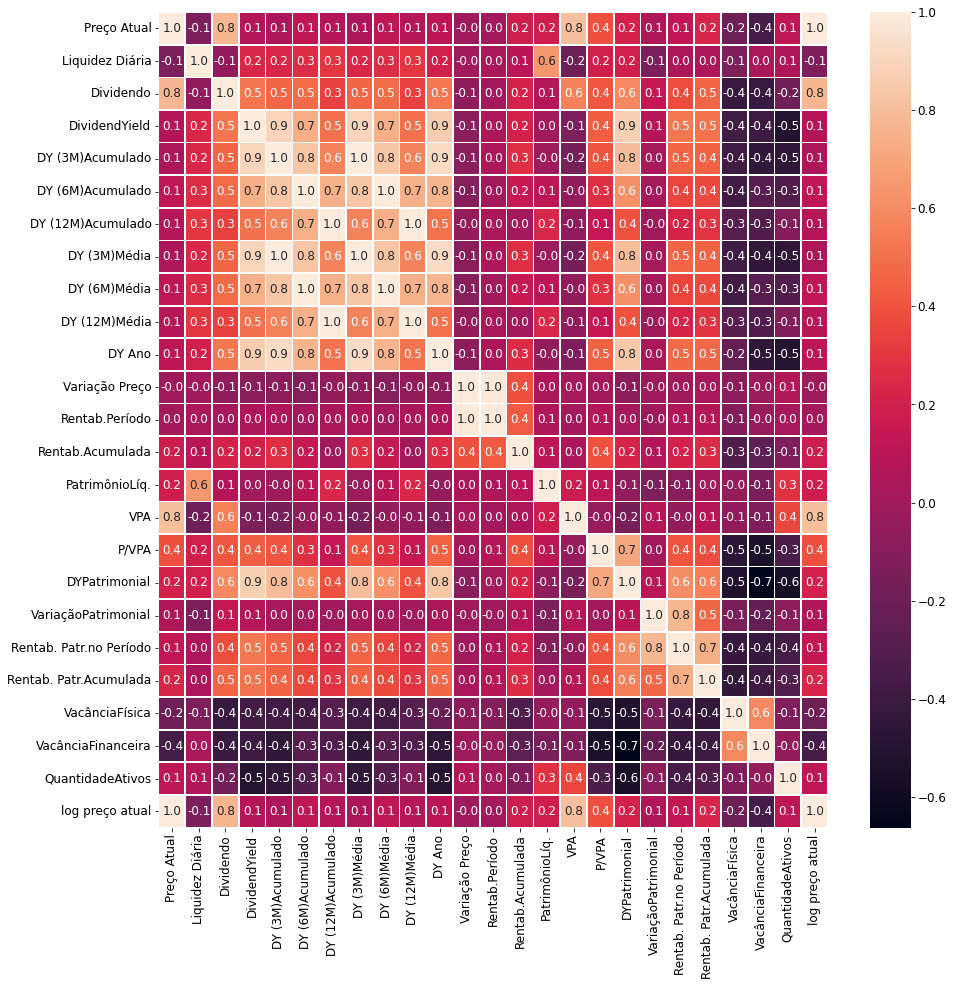

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = fii_df_an.corr(method='spearman')

plot = sns.heatmap(corr_matrix, annot= True, fmt='.1f', linewidth=0.7)
plt.rcParams.update({'font.size':12})

Podemos notar que, aparentemente, há uma correlação forte do Preço em relação ao Valor Patrimonial por Ação (VPA) e, também, pelo Dividendo.
O VPA possui uma correlação razoável em relação aos Dividendos.

### 5.3 Comparando a Média e Mediana do DY(12m) Acumulado

In [ ]:
pivot_table_fiis = pd.pivot_table(fii_df_an, values='DY (12M)Acumulado', index=['Setor'], columns=[], aggfunc=('mean','median'))
pivot_table_fiis.sort_values('mean', ascending=False)

,mean,median
Setor,,
Outros,9.391176,9.990
Hospital,8.563333,9.330
Títulos e Val. Mob.,8.520889,10.360
Logística,7.820455,8.115
Híbrido,7.100455,7.960
Lajes Corporativas,6.918462,7.260
Hotel,6.826667,5.410
Shoppings,5.252273,6.790
Residencial,2.394286,0.000


## **6. Analisando a média por setor**

In [ ]:
fii_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [ ]:
stack_df = fii_df.copy()

In [ ]:
stack_df[float_columns] = stack_df[float_columns].fillna(value=0)

In [ ]:
indicadores = [
               'Códigodo fundo',
               'Setor',
               'DY (12M)Acumulado',
               'VacânciaFísica',
               'VacânciaFinanceira',
               'P/VPA',
               'QuantidadeAtivos',
               'Liquidez Diária'
              ]

In [ ]:
df_aux = stack_df[indicadores]

In [ ]:
df_aux

,Códigodo fundo,Setor,DY (12M)Acumulado,VacânciaFísica,VacânciaFinanceira,P/VPA,QuantidadeAtivos,Liquidez Diária
0,FIVN11,Shoppings,0.00,56.00,0.0,0.31,1,836.0
1,BZLI11,Títulos e Val. Mob.,0.00,0.00,0.0,1.37,0,44041.0
2,XTED11,Lajes Corporativas,0.00,0.00,100.0,0.44,1,1713.0
3,ALMI11,Lajes Corporativas,0.00,64.05,0.0,0.41,1,37.0
4,PABY11,Híbrido,0.00,0.00,0.0,-0.60,1,1.0
...,...,...,...,...,...,...,...,...
277,RNDP11,Títulos e Val. Mob.,8.38,0.00,0.0,0.81,0,118.0
278,PLCR11,Híbrido,12.96,0.00,0.0,0.94,0,5941.0
279,CXCO11,Lajes Corporativas,9.31,0.00,0.0,0.80,0,6708.0
280,PATL11,Híbrido,9.13,0.00,0.0,0.78,4,19608.0


In [ ]:
media_setor = df_aux.groupby('Setor').agg(['mean','std'])

In [ ]:
media_setor

DY (12M)Acumulado           VacânciaFísica             \
                                 mean       std           mean        std   
Setor                                                                       
Hospital                     8.563333  1.468650       0.000000   0.000000   
Hotel                        6.826667  2.933843      43.300000  37.498933   
Híbrido                      7.100455  4.682826       2.422727   5.283115   
Lajes Corporativas           6.918462  4.372970      24.870256  29.459103   
Logística                    7.820455  2.762946       7.263636  17.558000   
Outros                       9.391176  4.467487       2.687353   8.553492   
Residencial                  2.394286  4.132037       4.342857  10.470093   
Shoppings                    5.252273  2.943089      10.806364  12.131324   
Títulos e Val. Mob.          8.520889  5.512200       0.000000   0.000000   

                    VacânciaFinanceira                P/VPA            \
                                  mean        std      mean       std   
Setor                                                                   
Hospital                      0.000000   0.000000  0.843333  0.135769   
Hotel                         0.000000   0.000000  0.816667  0.237136   
Híbrido                       1.280000   4.641644  0.834091  0.271707   
Lajes Corporativas            6.400256  18.772204  0.694359  0.234552   
Logística                     0.440909   1.437809  0.842727  0.146553   
Outros                        0.561176   2.272758  0.810882  0.210819   
Residencial                   0.000000   0.000000  0.787143  0.529708   
Shoppings                     0.000000   0.000000  0.706818  0.224529   
Títulos e Val. Mob.           0.000000   0.000000  1.015778  0.729007   

                    QuantidadeAtivos            Liquidez Diária                
                                mean        std            mean           std  
Setor                                                                          
Hospital                    1.000000   0.000000      999.666667   1678.654918  
Hotel                       9.333333  12.096832     2479.000000   1237.184303  
Híbrido                     4.022727   6.256118    23871.795455  84317.535563  
Lajes Corporativas          4.256410  10.512444     4412.333333   6665.010666  
Logística                   7.409091   5.586200     9930.363636  12987.466326  
Outros                      6.558824  14.581414    18087.264706  26881.030485  
Residencial                 0.857143   1.573592     2650.714286   5740.563669  
Shoppings                   4.454545   5.369466     6623.409091  10192.600129  
Títulos e Val. Mob.         0.066667   0.632456    22471.266667  54363.292645

In [ ]:
media_setor.loc['Residencial','DY (12M)Acumulado']

mean    2.394286
std     4.132037
Name: Residencial, dtype: float64

In [ ]:
media_setor.loc['Residencial',('DY (12M)Acumulado','mean')]

2.394285714285714

## **7. Criando uma função com uma estratégia para oportunidades do mercado**

In [ ]:
def opndd_media_setor(df, setor='Shoppings', label_setor='Setor'):
  
  media_setor = df_aux.groupby('Setor').agg(['mean','std'])

  df_setor = df[df[label_setor].isin([setor])]

  filter_ = \
      (df_setor['QuantidadeAtivos'] > 1) &\
      (df_setor['Liquidez Diária'] > 50) &\
      (df_setor['P/VPA'] < 1.0) &\
      (df_setor['DY (12M)Acumulado'] > media_setor.loc[setor, ('DY (12M)Acumulado','mean')])
  
  print('Média do setor Yield: {}'.format(media_setor.loc[setor, ('DY (12M)Acumulado','mean')]))
  print('Média do setor P/VPA: {}'.format(media_setor.loc[setor, ('P/VPA','mean')]))
  print('Média do setor Ativos: {}'.format(media_setor.loc[setor, ('QuantidadeAtivos','mean')]))
  print('Total FIIs: {}'.format(len(df_setor[filter_])))

  return df_setor[filter_]

In [ ]:
list(fii_df['Setor'].unique())

['Shoppings',
 'Títulos e Val. Mob.',
 'Lajes Corporativas',
 'Híbrido',
 'Outros',
 'Logística',
 'Hospital',
 'Residencial',
 'Hotel']

In [ ]:
oportunidade = opndd_media_setor(df_aux, setor='Logística')
oportunidade.sort_values('DY (12M)Acumulado', ascending=False, inplace=True)
oportunidade

Média do setor Yield: 7.820454545454546
Média do setor P/VPA: 0.8445454545454545
Média do setor Ativos: 7.409090909090909
Total FIIs: 8


,Códigodo fundo,Setor,DY (12M)Acumulado,VacânciaFísica,VacânciaFinanceira,P/VPA,QuantidadeAtivos,Liquidez Diária
205,BLMG11,Logística,11.23,0.0,0.0,0.83,4,7346.0
62,SDIL11,Logística,9.41,2.6,0.0,0.88,5,5590.0
65,EURO11,Logística,9.24,0.0,0.0,0.75,6,359.0
214,RBRL11,Logística,8.97,0.0,0.0,0.81,6,2016.0
177,GGRC11,Logística,8.78,0.0,0.0,0.80,15,10147.0
78,FIIP11B,Logística,8.72,0.0,0.0,0.77,7,234.0
54,LGCP11,Logística,8.10,0.5,0.0,0.75,5,751.0
240,LVBI11,Logística,7.99,0.5,0.0,0.87,10,17823.0
